In [1]:
import numpy as np
import pandas as pd
from tqdm import  tqdm
import pickle
import cobra
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
### input 
unikp_km_predict_path = '../../Results/kcat_km_predict/yeast8U_unikp.csv'
unikp_kcat_predict_path = '../../Results/kcat_km_predict/yeast8U_unikp.csv'
km_km_predict_path = '../../Results/kcat_km_predict/yeast8U_km_km_predict.csv'
dlkcat_kcat_predict_path = '../../Results/kcat_km_predict/yeast8U_kcat_predict.csv'
turnup_kcat_predict_path = '../../Results/kcat_km_predict/yeast8U_kcat_result_TurNuP.csv'


### output
dlkcat_kcat_predict_figure = '../../Results/Figures/fig3-a.pdf'#pdf
unikp_kcat_predict_figure = '../../Results/Figures/fig3-b.pdf'#pdf
turnup_kcat_predict_figure = '../../Results/Figures/fig3-c.pdf'#pdf
km_km_predict_figure = '../../Results/Figures/fig3-d.pdf'#pdf
unikp_km_predict_figure = '../../Results/Figures/fig3-e.pdf'#pdf

# unikp_km

In [3]:
km_pre_df = pd.read_csv(unikp_km_predict_path,index_col=None)
print(km_pre_df.shape)

sce_seq_rxn_smiles_with_rxn = km_pre_df[km_pre_df['rea_id'].str.contains('rxn')]
sce_seq_rxn_smiles_without_rxn = km_pre_df[~km_pre_df['rea_id'].str.contains('rxn')]
data_values_with_rxn = np.sort(sce_seq_rxn_smiles_with_rxn["km"])  # median
data_len_with_rxn = len(data_values_with_rxn)
data_proportions_with_rxn = np.arange(1, data_len_with_rxn + 1) / data_len_with_rxn
data_values_without_rxn = np.sort(sce_seq_rxn_smiles_without_rxn["km"])  # KM
data_len_without_rxn = len(data_values_without_rxn)
data_proportions_without_rxn = np.arange(1, data_len_without_rxn + 1) / data_len_without_rxn

median_with_rxn = np.median(data_values_with_rxn)
median_without_rxn = np.median(data_values_without_rxn)
print("Median with rxn:", median_with_rxn)
print("Median without rxn:", median_without_rxn)

(201634, 14)
Median with rxn: 0.191781794513303
Median without rxn: 0.1151745980565762


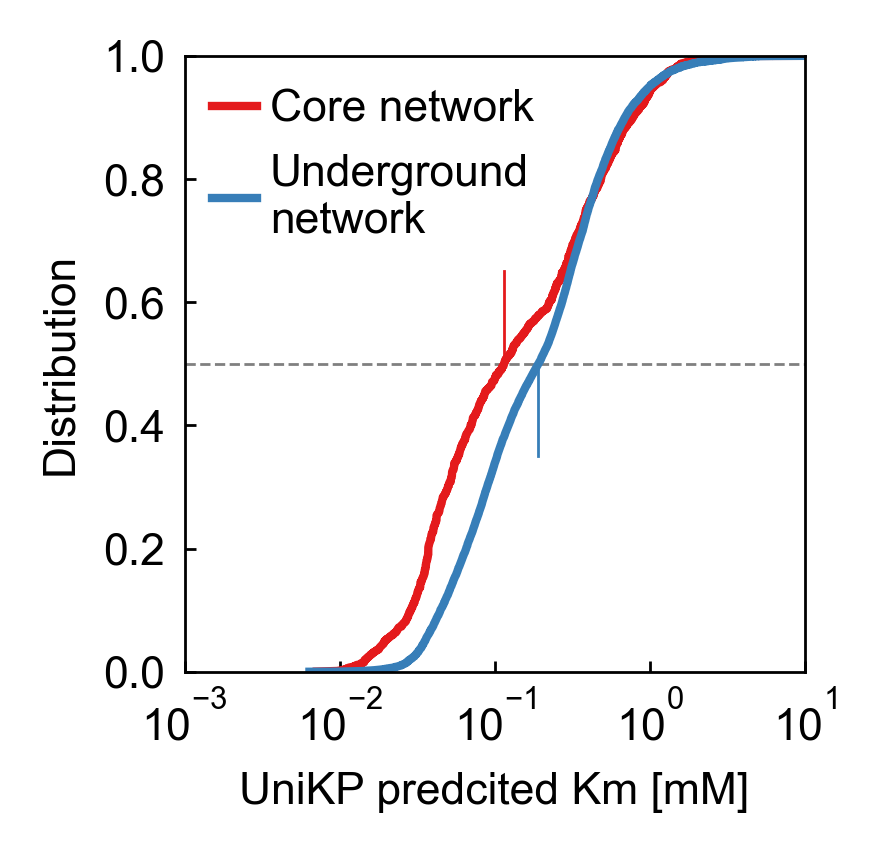

In [4]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.plot(data_values_without_rxn, data_proportions_without_rxn, color='#e41a1c', linestyle='-', linewidth=1.5, label='Core network')
plt.plot(data_values_with_rxn, data_proportions_with_rxn, color='#377eb8', linestyle='-', linewidth=1.5, label='Underground\nnetwork')
plt.plot([median_without_rxn, median_without_rxn], [0.5, 0.65], color='#e41a1c', linestyle='-', linewidth=0.5)
plt.plot([median_with_rxn, median_with_rxn], [0.35, 0.5], color='#377eb8', linestyle='-', linewidth=0.5)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('UniKP predcited Km [mM]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.001, 10)
plt.xscale('log')
plt.xticks([0.001, 0.01, 0.1, 1,10])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
plt.savefig(unikp_km_predict_figure, dpi=400, bbox_inches='tight')
plt.show()

# km_km_predict

In [5]:
km_pre_df = pd.read_csv(km_km_predict_path,index_col=None)
km_pre_df.rename(columns={'KM':'km'},inplace=True)
print(km_pre_df.shape)

sce_seq_rxn_smiles_with_rxn = km_pre_df[km_pre_df['rea_id'].str.contains('rxn')]
sce_seq_rxn_smiles_without_rxn = km_pre_df[~km_pre_df['rea_id'].str.contains('rxn')]
data_values_with_rxn = np.sort(sce_seq_rxn_smiles_with_rxn["km"])  # median
data_len_with_rxn = len(data_values_with_rxn)
data_proportions_with_rxn = np.arange(1, data_len_with_rxn + 1) / data_len_with_rxn
data_values_without_rxn = np.sort(sce_seq_rxn_smiles_without_rxn["km"])  # KM
data_len_without_rxn = len(data_values_without_rxn)
data_proportions_without_rxn = np.arange(1, data_len_without_rxn + 1) / data_len_without_rxn

median_with_rxn = np.median(data_values_with_rxn)
median_without_rxn = np.median(data_values_without_rxn)
print("Median with rxn:", median_with_rxn)
print("Median without rxn:", median_without_rxn)

(214244, 10)
Median with rxn: 0.2762616
Median without rxn: 0.11426287


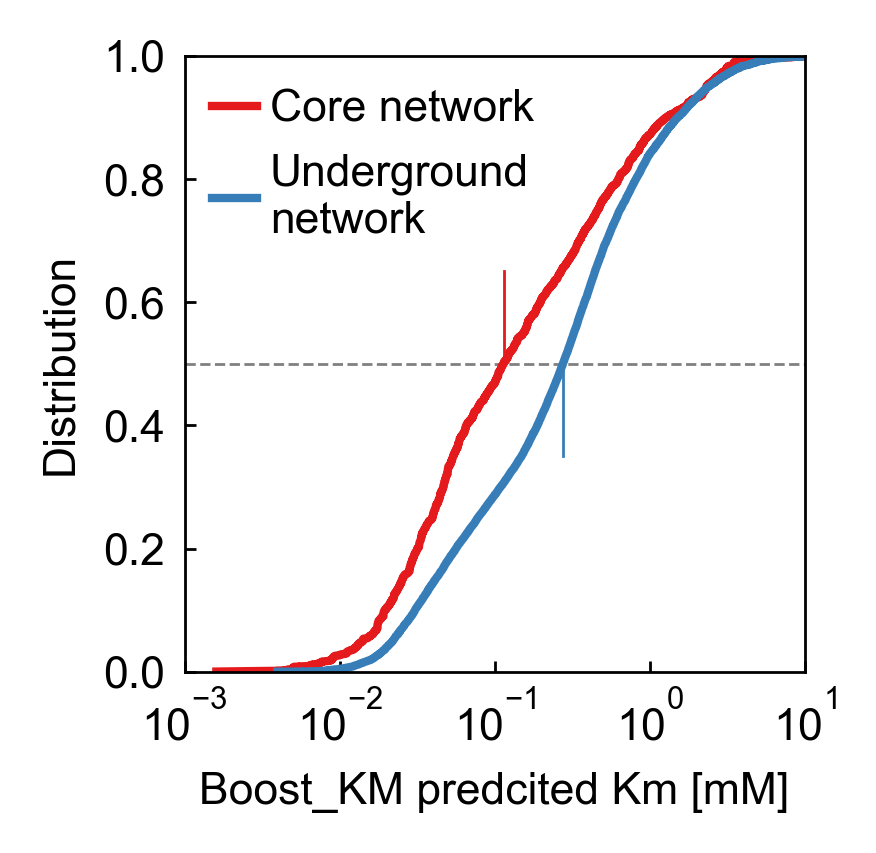

In [6]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.plot(data_values_without_rxn, data_proportions_without_rxn, color='#e41a1c', linestyle='-', linewidth=1.5, label='Core network')
plt.plot(data_values_with_rxn, data_proportions_with_rxn, color='#377eb8', linestyle='-', linewidth=1.5, label='Underground\nnetwork')
plt.plot([median_without_rxn, median_without_rxn], [0.5, 0.65], color='#e41a1c', linestyle='-', linewidth=0.5,zorder=0)
plt.plot([median_with_rxn, median_with_rxn], [0.35, 0.5], color='#377eb8', linestyle='-', linewidth=0.5,zorder=0)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('Boost_KM predcited Km [mM]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.001, 10)
plt.xscale('log')
plt.xticks([0.001, 0.01, 0.1, 1,10])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
plt.savefig(km_km_predict_figure, dpi=400, bbox_inches='tight')
plt.show()

# dlkcat_kcat

In [7]:
kcat_pre_df = pd.read_csv(dlkcat_kcat_predict_path,index_col=None)
print(kcat_pre_df.shape)

sce_seq_rxn_smiles_with_rxn = kcat_pre_df[kcat_pre_df['rea_id'].str.contains('rxn')]
sce_seq_rxn_smiles_without_rxn = kcat_pre_df[~kcat_pre_df['rea_id'].str.contains('rxn')]
data_values_with_rxn = np.sort(sce_seq_rxn_smiles_with_rxn["kcat"])  # median
data_len_with_rxn = len(data_values_with_rxn)
data_proportions_with_rxn = np.arange(1, data_len_with_rxn + 1) / data_len_with_rxn
data_values_without_rxn = np.sort(sce_seq_rxn_smiles_without_rxn["kcat"])  # KM
data_len_without_rxn = len(data_values_without_rxn)
data_proportions_without_rxn = np.arange(1, data_len_without_rxn + 1) / data_len_without_rxn
median_with_rxn = np.median(data_values_with_rxn)
median_without_rxn = np.median(data_values_without_rxn)
print("Median with rxn:", median_with_rxn)
print("Median without rxn:", median_without_rxn)

(214244, 11)
Median with rxn: 5.6738
Median without rxn: 5.2713


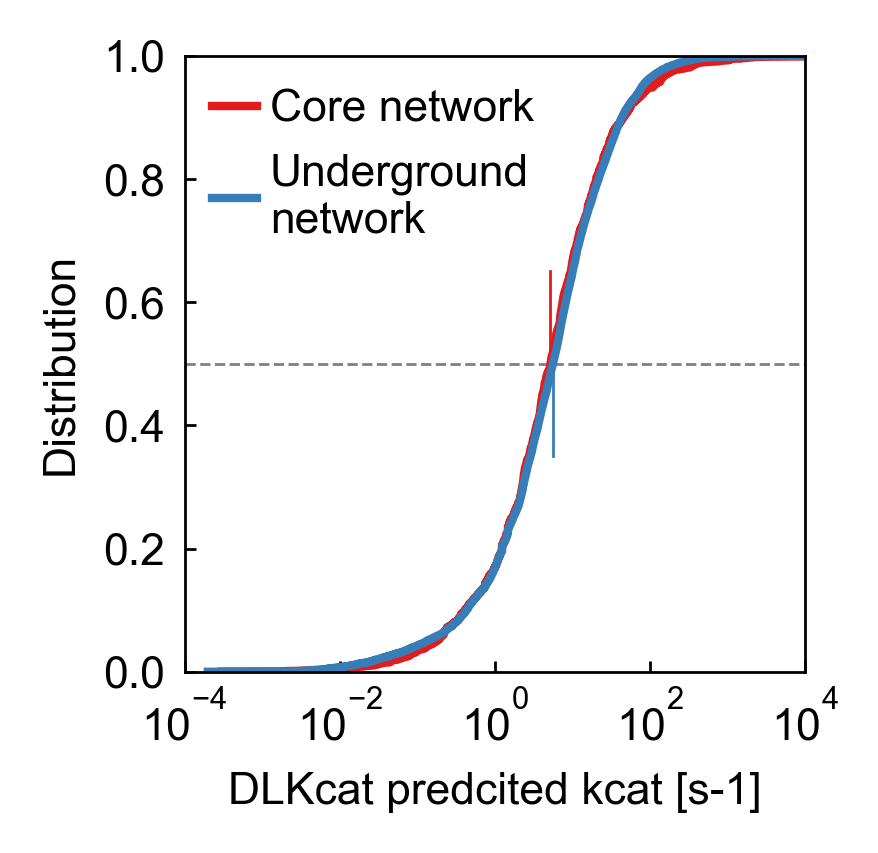

In [8]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.plot(data_values_without_rxn, data_proportions_without_rxn, color='#e41a1c', linestyle='-', linewidth=1.5, label='Core network')
plt.plot(data_values_with_rxn, data_proportions_with_rxn, color='#377eb8', linestyle='-', linewidth=1.5, label='Underground\nnetwork')
plt.plot([median_without_rxn, median_without_rxn], [0.5, 0.65], color='#e41a1c', linestyle='-', linewidth=0.5,zorder=0)
plt.plot([median_with_rxn, median_with_rxn], [0.35, 0.5], color='#377eb8', linestyle='-', linewidth=0.5,zorder=0)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('DLKcat predcited kcat [s-1]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.0001, 10000)
plt.xscale('log')
plt.xticks([0.0001, 0.01, 1,100,10000])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
# plt.text(0.004, 0.6, 'P = 0.37', fontsize=8, ha='center', family='Arial')
plt.savefig(dlkcat_kcat_predict_figure, dpi=400, bbox_inches='tight')
plt.show()

# unikp_kcat

In [9]:
kcat_pre_df = pd.read_csv(unikp_kcat_predict_path,index_col=None)
print(kcat_pre_df.shape)

sce_seq_rxn_smiles_with_rxn = kcat_pre_df[kcat_pre_df['rea_id'].str.contains('rxn')]
sce_seq_rxn_smiles_without_rxn = kcat_pre_df[~kcat_pre_df['rea_id'].str.contains('rxn')]
data_values_with_rxn = np.sort(sce_seq_rxn_smiles_with_rxn["kcat"])  # median
data_len_with_rxn = len(data_values_with_rxn)
data_proportions_with_rxn = np.arange(1, data_len_with_rxn + 1) / data_len_with_rxn
data_values_without_rxn = np.sort(sce_seq_rxn_smiles_without_rxn["kcat"])  # KM
data_len_without_rxn = len(data_values_without_rxn)
data_proportions_without_rxn = np.arange(1, data_len_without_rxn + 1) / data_len_without_rxn
median_with_rxn = np.median(data_values_with_rxn)
median_without_rxn = np.median(data_values_without_rxn)
print("Median with rxn:", median_with_rxn)
print("Median without rxn:", median_without_rxn)

(201634, 14)
Median with rxn: 3.402511339224805
Median without rxn: 4.100950135855551


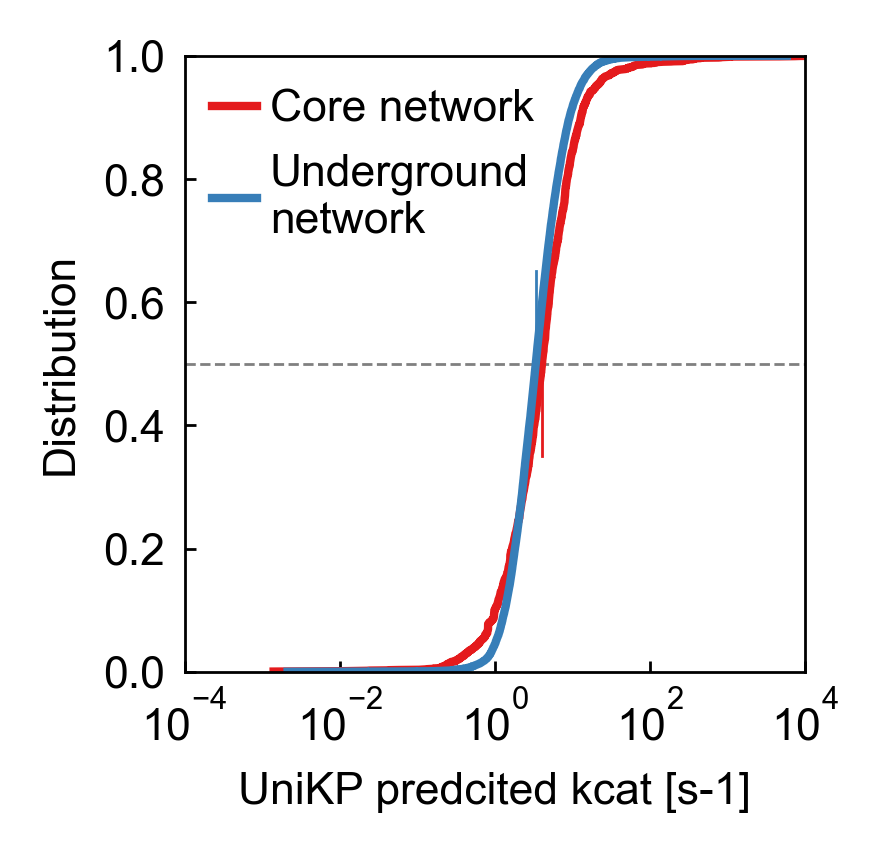

In [10]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.plot(data_values_without_rxn, data_proportions_without_rxn, color='#e41a1c', linestyle='-', linewidth=1.5, label='Core network')
plt.plot(data_values_with_rxn, data_proportions_with_rxn, color='#377eb8', linestyle='-', linewidth=1.5, label='Underground\nnetwork')
plt.plot([median_without_rxn, median_without_rxn], [0.35, 0.5], color='#e41a1c', linestyle='-', linewidth=0.5,zorder=0)
plt.plot([median_with_rxn, median_with_rxn], [0.5, 0.65], color='#377eb8', linestyle='-', linewidth=0.5,zorder=0)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('UniKP predcited kcat [s-1]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.0001, 10000)
plt.xscale('log')
plt.xticks([0.0001, 0.01, 1,100,10000])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
# plt.text(0.004, 0.6, 'P = 0.37', fontsize=8, ha='center', family='Arial')
plt.savefig(unikp_kcat_predict_figure, dpi=400, bbox_inches='tight')
plt.show()

# turnup_kcat

In [11]:
kcat_pre_df = pd.read_csv(turnup_kcat_predict_path,index_col=None)
print(kcat_pre_df.shape)
sce_seq_rxn_smiles_with_rxn = kcat_pre_df[kcat_pre_df['rea_id'].str.contains('rxn')]
sce_seq_rxn_smiles_without_rxn = kcat_pre_df[~kcat_pre_df['rea_id'].str.contains('rxn')]
data_values_with_rxn = np.sort(sce_seq_rxn_smiles_with_rxn["kcat"])  # median
data_len_with_rxn = len(data_values_with_rxn)
data_proportions_with_rxn = np.arange(1, data_len_with_rxn + 1) / data_len_with_rxn
data_values_without_rxn = np.sort(sce_seq_rxn_smiles_without_rxn["kcat"])  # KM
data_len_without_rxn = len(data_values_without_rxn)
data_proportions_without_rxn = np.arange(1, data_len_without_rxn + 1) / data_len_without_rxn
median_with_rxn = np.median(data_values_with_rxn)
median_without_rxn = np.median(data_values_without_rxn)
print("Median with rxn:", median_with_rxn)
print("Median without rxn:", median_without_rxn)

(126892, 6)
Median with rxn: 10.716813
Median without rxn: 10.982731


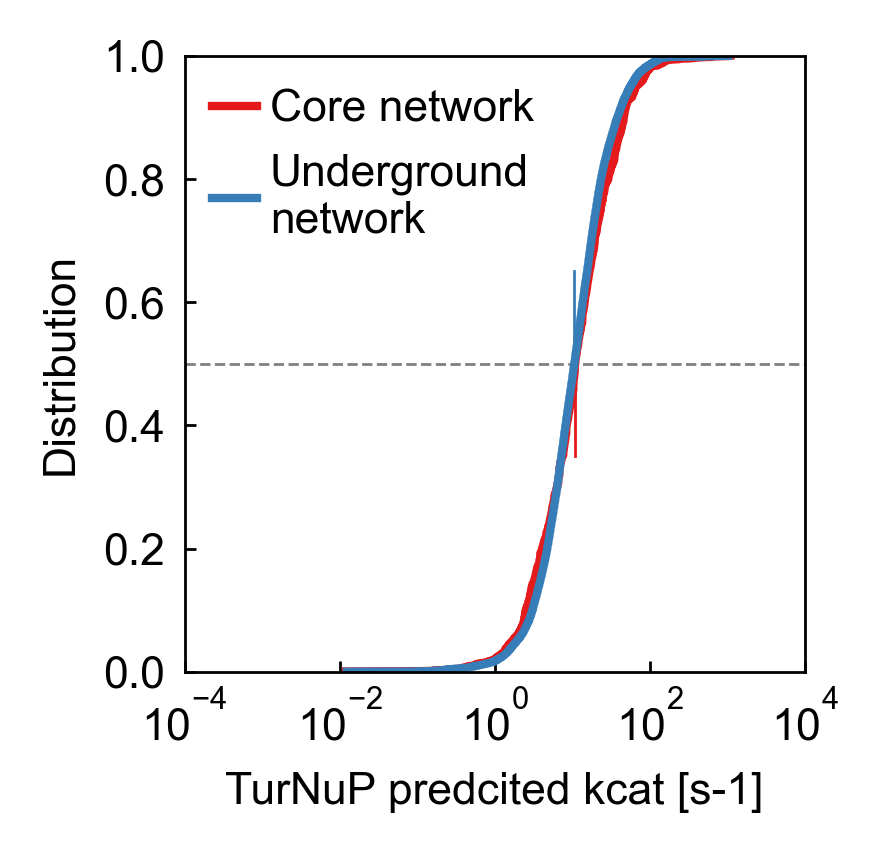

In [12]:
plt.figure(figsize=(2, 2), dpi=400)
plt.rcParams.update({'font.size': 8})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']= 42
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.plot(data_values_without_rxn, data_proportions_without_rxn, color='#e41a1c', linestyle='-', linewidth=1.5, label='Core network')
plt.plot(data_values_with_rxn, data_proportions_with_rxn, color='#377eb8', linestyle='-', linewidth=1.5, label='Underground\nnetwork')
plt.plot([median_without_rxn, median_without_rxn], [0.35, 0.5], color='#e41a1c', linestyle='-', linewidth=0.5,zorder=0)
plt.plot([median_with_rxn, median_with_rxn], [0.5, 0.65], color='#377eb8', linestyle='-', linewidth=0.5,zorder=0)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5,zorder=-1)
plt.ylabel('Distribution', fontsize=8)
plt.xlabel('TurNuP predcited kcat [s-1]', fontsize=8)
plt.ylim(0, 1)
plt.xlim(0.0001, 10000)
plt.xscale('log')
plt.xticks([0.0001, 0.01, 1,100,10000])
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  
plt.legend(frameon=False, loc='upper left', fontsize=8, bbox_to_anchor=(-0.02, 1.01),labelspacing=0.5, handletextpad=0.3, handlelength=1)  # 添加图例
# plt.text(0.004, 0.6, 'P = 0.37', fontsize=8, ha='center', family='Arial')
plt.savefig(turnup_kcat_predict_figure, dpi=400, bbox_inches='tight')
plt.show()